# problem3

In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3846)

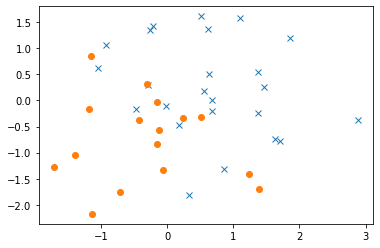

In [2]:
# prepare dataset

n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

projected gradient

In [3]:
dual_history = []
hinge_history = []

num_iter = 300
lam = 80
alpha = np.random.randn(n)
eta_base = 1

In [4]:
def proj01 (alp):
    alp_proj = np.zeros(alp.shape)
    for i in range(len(alp)):
        if np.abs(alp[i]) <= np.abs(alp[i]-1):
            alp_proj[i]=0
        else:
            alp_proj[i]=1
    return alp_proj

def alpha_to_w (alp, y, x):
    return 1 / (2 * lam) * x.T @ (alp * y)

def yx_to_K (y, x):
    Y = np.diag(y)
    return Y.T @ x @ x.T @ Y

def l2_hinge_loss (alp, y, x):
    w = alpha_to_w(alp, y, x)
    loss = 1 - y * (x @ w)
    hinge_loss = np.max((np.zeros(y.shape[0]), loss), axis=0)
    hinge_loss = np.sum(hinge_loss)
    return hinge_loss + lam * w.T @ w

def dual_lag_loss (alp, y, x):
    K = yx_to_K(y, x)
    return -1 / (4*lam) * alp.T @ K @ alp + np.sum(alp)

def next_alpha (alp, y, x, eta):
    K = yx_to_K(y, x)
    direction = 1 / (2*lam) * (K @ alp) -1
    return proj01(alp - eta * direction)


for t in range(1,num_iter+1):
    dual_history.append(dual_lag_loss(alpha, y, x))
    hinge_history.append(l2_hinge_loss(alpha, y, x))

    eta = eta_base / np.sqrt(t)
    alpha = next_alpha(alpha, y, x, eta)

Text(0, 0.5, 'score and loss')

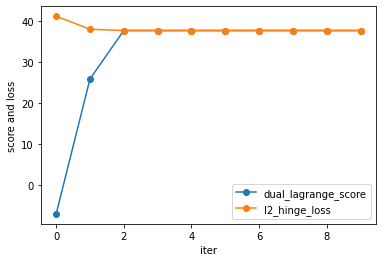

In [5]:
show_iter = 10

# plot the result
plt.plot(dual_history[:show_iter], 'o-', label='dual_lagrange_score')
plt.plot(hinge_history[:show_iter], 'o-', label='l2_hinge_loss')
plt.legend()
#plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('score and loss')

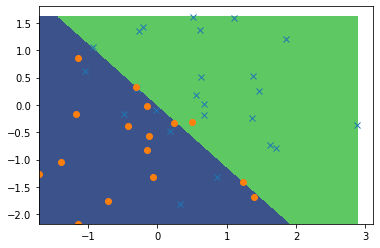

In [6]:
# plot boundary for binary classification

def plot_bi (x1, x2, y, w):
    delta = 0.01
    xa = np.arange(np.min(x1), np.max(x1), delta)
    ya = np.arange(np.min(x2), np.max(x2), delta)
    xm, ym = np.meshgrid(xa, ya)

    z = xm * w[0] + ym * w[1]

    plt.plot(np.extract(y==1,x1),np.extract(y==1,x2), 'x')
    plt.plot(np.extract(y==-1,x1),np.extract(y==-1,x2), 'o')

    plt.contourf(xm, ym, z, 0)


plot_bi(x[:,0], x[:,1], y, alpha_to_w(alpha, y, x))